# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.

**All data was obtained from Udacity.**

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

twitter_archive_enhanced = pd.read_csv(r"C:\Users\joelh\Downloads\twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
image_predictions = pd.read_csv(r"C:\Users\joelh\Downloads\image-predictions.tsv")

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

As I could not create a Twitter developer account I have used the data provided by Udacity. Code from Udacity is copied below, as Udacity required.

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

### Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
### These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

### NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
### df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
### change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
### NOTE TO REVIEWER: this student had mobile verification issues so the following
### Twitter API code was sent to this student from a Udacity instructor
### Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

### Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
### Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [3]:
import zipfile

with zipfile.ZipFile('tweet-json.zip') as z:
    z.extractall()
    
import json
dataset = []
for line in open('tweet-json copy', 'r'):
    dataset.append(json.loads(line))
    
tweet_json = pd.DataFrame(dataset)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [4]:
tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


In [5]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
twitter_archive_enhanced[['doggo','floofer','pupper','puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1976
                pupper  None      245
doggo  None     None    None       83
None   None     None    puppo      29
doggo  None     pupper  None       12
None   floofer  None    None        9
doggo  None     None    puppo       1
       floofer  None    None        1
dtype: int64

In [7]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
twitter_archive_enhanced['timestamp']

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2351    2015-11-16 00:24:50 +0000
2352    2015-11-16 00:04:52 +0000
2353    2015-11-15 23:21:54 +0000
2354    2015-11-15 23:05:30 +0000
2355    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2356, dtype: object

In [9]:
twitter_archive_enhanced[['rating_numerator', 'rating_denominator']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   rating_numerator    2356 non-null   int64
 1   rating_denominator  2356 non-null   int64
dtypes: int64(2)
memory usage: 36.9 KB


In [10]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [11]:
tweet_json['full_text'][1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

### Quality issues
1. Retweeted images are present in twitter_archive_enhanced.

2. Non-descriptive headers in twitter_archive_enhanced.

3. Non-descriptive headers in tweet_json.

4. The relevant variables favourite count, retweet count and tweet id do not have the same names in tweet_json and twitter_archive_enhanced.

5. Timestamp column in twitter_archive_enhanced is unparsed.

6. Created_at column in tweet_json is unparsed.

7. Column names timestamp and created_at do not match.

8. Ratings data is uncorroborated.

### Tidiness issues
1. The two files twitter_archive_enhanced and tweet_json are not combined into one file with all the relevant data.

2. In twitter_archive_enhanced, the variable 'dog stage' is separated into four columns: 'doggo', 'floofer', 'pupper' and 'puppo'.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [12]:
# Make copies of original pieces of data
tweet_json_copy = tweet_json.copy()

In [13]:
twitter_archive_enhanced_copy = twitter_archive_enhanced.copy()

### Issue #1:

#### Define:

The columns contained tweet id do not have the same name in the two files above.

#### Code:

In [14]:
twitter_archive_enhanced_copy.rename(columns={'tweet_id':'tweet_id'}, inplace=True)

In [15]:
tweet_json_copy.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [16]:
tweet_json_copy.head()

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


### Issue #2:

#### Define

Both twitter_archive_enhanced_copy and tweet_json_copy should be combined based on tweet_id.

#### Code

In [17]:
twitter_data = twitter_archive_enhanced_copy.merge(tweet_json_copy, how = 'inner', on='tweet_id')

#### Test

In [18]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2354 non-null   int64  
 1   in_reply_to_status_id_x        78 non-null     float64
 2   in_reply_to_user_id_x          78 non-null     float64
 3   timestamp                      2354 non-null   object 
 4   source_x                       2354 non-null   object 
 5   text                           2354 non-null   object 
 6   retweeted_status_id            179 non-null    float64
 7   retweeted_status_user_id       179 non-null    float64
 8   retweeted_status_timestamp     179 non-null    object 
 9   expanded_urls                  2295 non-null   object 
 10  rating_numerator               2354 non-null   int64  
 11  rating_denominator             2354 non-null   int64  
 12  name                           2354 non-null   o

## Issue #3 

#### Define:

Drop the irrelevant columns in twitter_data. Keep the following columns for the analysis:

favorite_count
retweet_count
quoted_status_id
retweeted_status
doggo
floofer
puppo
pupper
retweeted_status_id
lang
full_text
entities (because I don't yet know what these are and there are many of them in the dataset)
created_at
timestamp
rating_numerator
rating_denominator
full_text
text


#### Code:


In [19]:
twitter_relevant_data = twitter_data[['favorite_count',
'retweet_count',
'quoted_status_id',
'retweeted_status',
'doggo',
'floofer',
'puppo',
'pupper',
'retweeted_status_id',
'lang',
'full_text',
'entities',
'created_at',
'timestamp',
'rating_numerator',
'rating_denominator',
'text']]

#### Test:

In [20]:
twitter_relevant_data.head()

,favorite_count,retweet_count,quoted_status_id,retweeted_status,doggo,floofer,puppo,pupper,retweeted_status_id,lang,full_text,entities,created_at,timestamp,rating_numerator,rating_denominator,text
0,39467,8853,NaN,NaN,None,None,None,None,NaN,en,This is Phineas. He's a mystical boy. Only eve...,"{'hashtags': [], 'symbols': [], 'user_mentions...",Tue Aug 01 16:23:56 +0000 2017,2017-08-01 16:23:56 +0000,13,10,This is Phineas. He's a mystical boy. Only eve...
1,33819,6514,NaN,NaN,None,None,None,None,NaN,en,This is Tilly. She's just checking pup on you....,"{'hashtags': [], 'symbols': [], 'user_mentions...",Tue Aug 01 00:17:27 +0000 2017,2017-08-01 00:17:27 +0000,13,10,This is Tilly. She's just checking pup on you....
2,25461,4328,NaN,NaN,None,None,None,None,NaN,en,This is Archie. He is a rare Norwegian Pouncin...,"{'hashtags': [], 'symbols': [], 'user_mentions...",Mon Jul 31 00:18:03 +0000 2017,2017-07-31 00:18:03 +0000,12,10,This is Archie. He is a rare Norwegian Pouncin...
3,42908,8964,NaN,NaN,None,None,None,None,NaN,en,This is Darla. She commenced a snooze mid meal...,"{'hashtags': [], 'symbols': [], 'user_mentions...",Sun Jul 30 15:58:51 +0000 2017,2017-07-30 15:58:51 +0000,13,10,This is Darla. She commenced a snooze mid meal...
4,41048,9774,NaN,NaN,None,None,None,None,NaN,en,This is Franklin. He would like you to stop ca...,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...",Sat Jul 29 16:00:24 +0000 2017,2017-07-29 16:00:24 +0000,12,10,This is Franklin. He would like you to stop ca...


## Issue #4

#### Define:

The columns created_at and timestamp need to be merged into one timestamp column. Drop the created_at column.

#### Code:

In [21]:
twitter_relevant_data = twitter_relevant_data.drop('created_at',axis=1)

#### Test:

In [22]:
twitter_relevant_data.head()

,favorite_count,retweet_count,quoted_status_id,retweeted_status,doggo,floofer,puppo,pupper,retweeted_status_id,lang,full_text,entities,timestamp,rating_numerator,rating_denominator,text
0,39467,8853,NaN,NaN,None,None,None,None,NaN,en,This is Phineas. He's a mystical boy. Only eve...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-08-01 16:23:56 +0000,13,10,This is Phineas. He's a mystical boy. Only eve...
1,33819,6514,NaN,NaN,None,None,None,None,NaN,en,This is Tilly. She's just checking pup on you....,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-08-01 00:17:27 +0000,13,10,This is Tilly. She's just checking pup on you....
2,25461,4328,NaN,NaN,None,None,None,None,NaN,en,This is Archie. He is a rare Norwegian Pouncin...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-07-31 00:18:03 +0000,12,10,This is Archie. He is a rare Norwegian Pouncin...
3,42908,8964,NaN,NaN,None,None,None,None,NaN,en,This is Darla. She commenced a snooze mid meal...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-07-30 15:58:51 +0000,13,10,This is Darla. She commenced a snooze mid meal...
4,41048,9774,NaN,NaN,None,None,None,None,NaN,en,This is Franklin. He would like you to stop ca...,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...",2017-07-29 16:00:24 +0000,12,10,This is Franklin. He would like you to stop ca...


## Issue #5:

#### Define:

Rename the following non-descriptive headers with the following names:

{'lang':'language'}

There were initially many more non-descriptive headers but those have been dropped as they were irrelevant to the analysis later.

#### Code:

In [23]:
twitter_relevant_data.rename(columns = {'lang':'language'}, inplace=True)

#### Test:

In [24]:
twitter_relevant_data.head()

,favorite_count,retweet_count,quoted_status_id,retweeted_status,doggo,floofer,puppo,pupper,retweeted_status_id,language,full_text,entities,timestamp,rating_numerator,rating_denominator,text
0,39467,8853,NaN,NaN,None,None,None,None,NaN,en,This is Phineas. He's a mystical boy. Only eve...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-08-01 16:23:56 +0000,13,10,This is Phineas. He's a mystical boy. Only eve...
1,33819,6514,NaN,NaN,None,None,None,None,NaN,en,This is Tilly. She's just checking pup on you....,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-08-01 00:17:27 +0000,13,10,This is Tilly. She's just checking pup on you....
2,25461,4328,NaN,NaN,None,None,None,None,NaN,en,This is Archie. He is a rare Norwegian Pouncin...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-07-31 00:18:03 +0000,12,10,This is Archie. He is a rare Norwegian Pouncin...
3,42908,8964,NaN,NaN,None,None,None,None,NaN,en,This is Darla. She commenced a snooze mid meal...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-07-30 15:58:51 +0000,13,10,This is Darla. She commenced a snooze mid meal...
4,41048,9774,NaN,NaN,None,None,None,None,NaN,en,This is Franklin. He would like you to stop ca...,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...",2017-07-29 16:00:24 +0000,12,10,This is Franklin. He would like you to stop ca...


## Issue #6:

#### Define:

The timestamp column is not parsed in a datetime format.

#### Code:

In [25]:
twitter_relevant_data['timestamp'] = pd.to_datetime(twitter_relevant_data.timestamp)

#### Test:

In [26]:
twitter_relevant_data.timestamp

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2349   2015-11-16 00:24:50+00:00
2350   2015-11-16 00:04:52+00:00
2351   2015-11-15 23:21:54+00:00
2352   2015-11-15 23:05:30+00:00
2353   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2354, dtype: datetime64[ns, UTC]

## Issue#7:

#### Define:

Merging the columns doggo, pupper, puppo, floofer into one column "dog stage".

#### Code:

In [27]:
twitter_relevant_data['dog_stage'] = twitter_relevant_data.doggo + twitter_relevant_data.puppo + twitter_relevant_data.pupper + twitter_relevant_data.floofer

In [28]:
twitter_relevant_data.loc[twitter_relevant_data.dog_stage == 'doggoNoneNoneNone', 'dog_stage'] = 'doggo'
twitter_relevant_data.loc[twitter_relevant_data.dog_stage =='NoneNoneNoneNone', 'dog_stage'] = 'None'
twitter_relevant_data.loc[twitter_relevant_data.dog_stage =='NonepuppoNoneNone', 'dog_stage'] = 'puppo'
twitter_relevant_data.loc[twitter_relevant_data.dog_stage =='doggoNonepupperNone', 'dog_stage'] = 'None'

twitter_relevant_data.loc[twitter_relevant_data.dog_stage == 'doggoNoneNonefloofer', 'dog_stage'] = 'None'
twitter_relevant_data.loc[twitter_relevant_data.dog_stage == 'doggopuppoNoneNone', 'dog_stage'] = 'None'



twitter_relevant_data.loc[twitter_relevant_data.dog_stage =='NoneNoneNonefloofer', 'dog_stage'] = 'floofer'
twitter_relevant_data.loc[twitter_relevant_data.dog_stage =='NoneNonepupperNone', 'dog_stage'] = 'pupper'

In [29]:
twitter_relevant_data = twitter_relevant_data.drop(['pupper', 'doggo', 'puppo', 'floofer'], axis=1)

#### Test:

In [30]:
twitter_relevant_data['dog_stage'].value_counts()

None       1989
pupper      244
doggo        83
puppo        29
floofer       9
Name: dog_stage, dtype: int64

In [31]:
twitter_relevant_data.head()

,favorite_count,retweet_count,quoted_status_id,retweeted_status,retweeted_status_id,language,full_text,entities,timestamp,rating_numerator,rating_denominator,text,dog_stage
0,39467,8853,NaN,NaN,NaN,en,This is Phineas. He's a mystical boy. Only eve...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-08-01 16:23:56+00:00,13,10,This is Phineas. He's a mystical boy. Only eve...,None
1,33819,6514,NaN,NaN,NaN,en,This is Tilly. She's just checking pup on you....,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-08-01 00:17:27+00:00,13,10,This is Tilly. She's just checking pup on you....,None
2,25461,4328,NaN,NaN,NaN,en,This is Archie. He is a rare Norwegian Pouncin...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-07-31 00:18:03+00:00,12,10,This is Archie. He is a rare Norwegian Pouncin...,None
3,42908,8964,NaN,NaN,NaN,en,This is Darla. She commenced a snooze mid meal...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-07-30 15:58:51+00:00,13,10,This is Darla. She commenced a snooze mid meal...,None
4,41048,9774,NaN,NaN,NaN,en,This is Franklin. He would like you to stop ca...,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...",2017-07-29 16:00:24+00:00,12,10,This is Franklin. He would like you to stop ca...,None


## Issue #8:

#### Define:

The ratings data is uncorroborated. We need to check that the rating numerators and denominators have been correctly pulled from the text data.

#### Code:

In [32]:
# First creating a new column with the data numerator/denominator:
twitter_relevant_data['slash'] = '/'
twitter_relevant_data['rating'] = twitter_relevant_data.rating_numerator.astype(str) + twitter_relevant_data.slash + twitter_relevant_data.rating_denominator.astype(str)

In [33]:
# Now checking that the rating in the 'rating' column is present in the 'text' column:
results = []
for index in range(len(twitter_relevant_data.rating)):
    result = twitter_relevant_data.text[index].find(twitter_relevant_data.rating[index])
    results.append(result)

In [34]:
results

[80,
 133,
 116,
 48,
 123,
 104,
 65,
 113,
 107,
 99,
 94,
 80,
 101,
 73,
 88,
 103,
 72,
 106,
 65,
 95,
 105,
 67,
 77,
 53,
 99,
 53,
 67,
 44,
 106,
 69,
 66,
 15,
 114,
 75,
 42,
 86,
 129,
 66,
 89,
 35,
 107,
 75,
 106,
 117,
 108,
 119,
 88,
 83,
 85,
 90,
 91,
 113,
 41,
 89,
 37,
 85,
 123,
 47,
 132,
 82,
 87,
 124,
 86,
 16,
 85,
 36,
 91,
 108,
 111,
 62,
 93,
 40,
 101,
 96,
 86,
 93,
 71,
 93,
 101,
 103,
 92,
 96,
 104,
 101,
 123,
 99,
 108,
 78,
 93,
 60,
 105,
 80,
 124,
 116,
 89,
 113,
 67,
 52,
 110,
 135,
 105,
 87,
 128,
 117,
 93,
 131,
 129,
 123,
 92,
 20,
 111,
 131,
 34,
 92,
 134,
 84,
 124,
 134,
 87,
 90,
 114,
 106,
 74,
 84,
 68,
 69,
 122,
 39,
 113,
 45,
 127,
 90,
 32,
 101,
 75,
 90,
 97,
 106,
 122,
 90,
 112,
 95,
 70,
 88,
 63,
 92,
 92,
 129,
 134,
 77,
 76,
 108,
 128,
 102,
 95,
 48,
 133,
 75,
 72,
 42,
 57,
 71,
 109,
 95,
 92,
 120,
 107,
 131,
 119,
 124,
 120,
 106,
 83,
 113,
 117,
 104,
 81,
 129,
 23,
 120,
 79,
 115,
 131,
 76,
 5

## Issue #9:

#### Define:

The retweeted rows need to be dropped.


#### Code:

In [35]:
twitter_relevant_data['retweeted_status'].values

array([nan, nan, nan, ..., nan, nan, nan], dtype=object)

In [36]:
twitter_relevant_data = twitter_relevant_data[twitter_relevant_data['retweeted_status'].isnull()]

In [37]:
twitter_relevant_data = twitter_relevant_data.drop(['retweeted_status', 'retweeted_status_id'], axis=1)

#### Test:

In [38]:
twitter_relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   favorite_count      2175 non-null   int64              
 1   retweet_count       2175 non-null   int64              
 2   quoted_status_id    28 non-null     float64            
 3   language            2175 non-null   object             
 4   full_text           2175 non-null   object             
 5   entities            2175 non-null   object             
 6   timestamp           2175 non-null   datetime64[ns, UTC]
 7   rating_numerator    2175 non-null   int64              
 8   rating_denominator  2175 non-null   int64              
 9   text                2175 non-null   object             
 10  dog_stage           2175 non-null   object             
 11  slash               2175 non-null   object             
 12  rating              2175 non-null 

Note there was no need for a tenth issue to be resolved since some of the above code resolves multiple issues in one go.

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [39]:
twitter_relevant_data.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [40]:
dataset = pd.read_csv('twitter_archive_master.csv')

In [41]:
dataset.head()

,Unnamed: 0,favorite_count,retweet_count,quoted_status_id,language,full_text,entities,timestamp,rating_numerator,rating_denominator,text,dog_stage,slash,rating
0,0,39467,8853,NaN,en,This is Phineas. He's a mystical boy. Only eve...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-08-01 16:23:56+00:00,13,10,This is Phineas. He's a mystical boy. Only eve...,None,/,13/10
1,1,33819,6514,NaN,en,This is Tilly. She's just checking pup on you....,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-08-01 00:17:27+00:00,13,10,This is Tilly. She's just checking pup on you....,None,/,13/10
2,2,25461,4328,NaN,en,This is Archie. He is a rare Norwegian Pouncin...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-07-31 00:18:03+00:00,12,10,This is Archie. He is a rare Norwegian Pouncin...,None,/,12/10
3,3,42908,8964,NaN,en,This is Darla. She commenced a snooze mid meal...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-07-30 15:58:51+00:00,13,10,This is Darla. She commenced a snooze mid meal...,None,/,13/10
4,4,41048,9774,NaN,en,This is Franklin. He would like you to stop ca...,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...",2017-07-29 16:00:24+00:00,12,10,This is Franklin. He would like you to stop ca...,None,/,12/10


### Insights:

Three insights resulted from the following analysis.

A scatter matrix was plotted of all the meaningful numerical data.

Note that because the rating denominator is constant (=10), it is enough to plot the rating numerator.

array([[<AxesSubplot:xlabel='favorite_count', ylabel='favorite_count'>,
        <AxesSubplot:xlabel='retweet_count', ylabel='favorite_count'>,
        <AxesSubplot:xlabel='rating_numerator', ylabel='favorite_count'>],
       [<AxesSubplot:xlabel='favorite_count', ylabel='retweet_count'>,
        <AxesSubplot:xlabel='retweet_count', ylabel='retweet_count'>,
        <AxesSubplot:xlabel='rating_numerator', ylabel='retweet_count'>],
       [<AxesSubplot:xlabel='favorite_count', ylabel='rating_numerator'>,
        <AxesSubplot:xlabel='retweet_count', ylabel='rating_numerator'>,
        <AxesSubplot:xlabel='rating_numerator', ylabel='rating_numerator'>]],
      dtype=object)

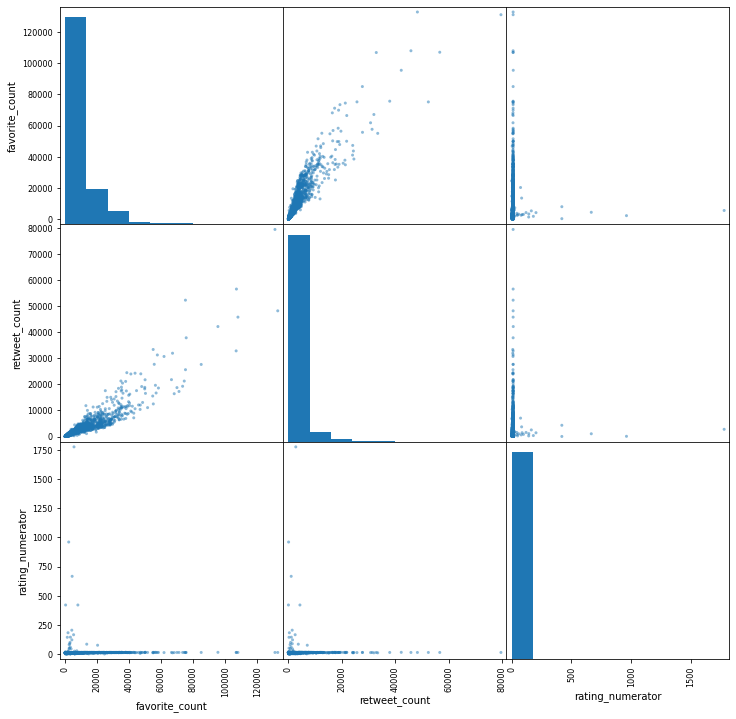

In [42]:
from pandas.plotting import scatter_matrix

features = ['favorite_count', 'retweet_count', 'rating_numerator']

scatter_matrix(dataset[features], figsize=(12,12))

Insights:

1. From the above scatter matrix, it seems there is a correlation between retweet count and favourite count.
2. However there appears to be no relationship between retweet count and rating, or between favourite count and rating! This indicates that rating is not meaningful. It is likely simply a feature which users enjoy but which has very little significance in terms of boosting WeRateDogs as a Twitter brand.

For a third insight, the correlation between retweet count and favourite count was investigated:

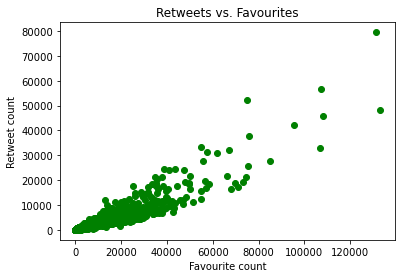

In [43]:
plt.scatter(dataset['favorite_count'],dataset['retweet_count'],color='g')
plt.title('Retweets vs. Favourites')
plt.ylabel('Retweet count')
plt.xlabel('Favourite count')
plt.show()

In [44]:
correlation = np.corrcoef(dataset['favorite_count'],dataset['retweet_count'])
correlation_coefficient = correlation[1][0]
correlation_coefficient

0.9117316533564103

This leads us to the third insight, which is that the correlation between favourite count and retweet count is in fact very strong and is about 0.912.

#### Further insights

We can however include further insights.

Below, the distributions of favourite count and retweet count are visualized simultaneously.

Text(0, 0.5, 'Probability Density')

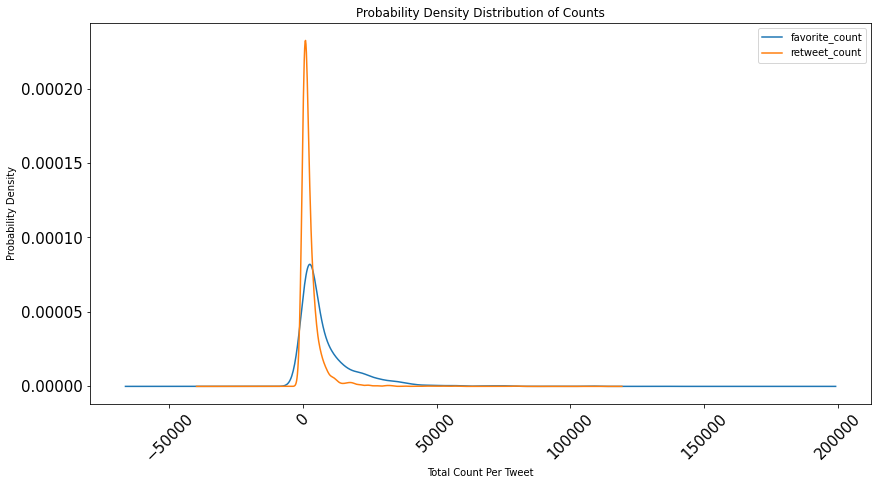

In [63]:
favourite_retweet = dataset[['favorite_count','retweet_count']]
favourite_retweet.plot(kind='kde',rot='45', grid=False, fontsize=15,figsize=(14,7),title='Probability Density Distribution of Counts')
plt.xlabel('Total Count Per Tweet')
plt.ylabel('Probability Density')


From the probability density plot above, we can see:

1. Both counts peak close to zero. By far the most likely count is a number close to 0 counts.
2. The favourite count is more likely to be greater than the retweet count. In other words, users are more likely to favourite tweets than to retweet them. This may be because retweeting is a public effort and shows up on your profile.